# Analyse de l'incidence de la varicelle

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [3]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [4]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202108          7  13464     9633   17295      20          14   
1     202107          7  13633    10325   16941      21          16   
2     202106          7  13383     9793   16973      20          15   
3     202105          7  12210     8988   15432      18          13   
4     202104          7  12026     8826   15226      18          13   
5     202103          7   8913     6375   11451      13           9   
6     202102          7   7795     5430   10160      12           8   
7     202101          7  10525     7750   13300      16          12   
8     202053          7  11978     8406   15550      18          13   
9     202052          7  12012     8285   15739      18          12   
10    202051          7  10564     7574   13554      16          11   
11    202050          7   7063     4744    9382      11           7   
12    202049          7   5026     3145    6907       8           5   
13    202048          7   6683     4312    9054      10           6   
14    202047          7   4999     2963    7035       8           5   
15    202046          7   3752     1963    5541       6           3   
16    202045          7   3696     2016    5376       6           3   
17    202044          7   4391     2375    6407       7           4   
18    202043          7   4376     2505    6247       7           4   
19    202042          7   4000     1979    6021       6           3   
20    202041          7   3961     2099    5823       6           3   
21    202040          7   2078      675    3481       3           1   
22    202039          7   1049      237    1861       2           1   
23    202038          7   2253      782    3724       3           1   
24    202037          7   1584      405    2763       2           0   
25    202036          7    919      100    1738       1           0   
26    202035          7    828        0    1694       1           0   
27    202034          7   2272      371    4173       3           0   
28    202033          7   1284      177    2391       2           0   
29    202032          7   2650      689    4611       4           1   
...      ...        ...    ...      ...     ...     ...         ...   
1548  199126          7  17608    11304   23912      31          20   
1549  199125          7  16169    10700   21638      28          18   
1550  199124          7  16171    10071   22271      28          17   
1551  199123          7  11947     7671   16223      21          13   
1552  199122          7  15452     9953   20951      27          17   
1553  199121          7  14903     8975   20831      26          16   
1554  199120          7  19053    12742   25364      34          23   
1555  199119          7  16739    11246   22232      29          19   
1556  199118          7  21385    13882   28888      38          25   
1557  199117          7  13462     8877   18047      24          16   
1558  199116          7  14857    10068   19646      26          18   
1559  199115          7  13975     9781   18169      25          18   
1560  199114          7  12265     7684   16846      22          14   
1561  199113          7   9567     6041   13093      17          11   
1562  199112          7  10864     7331   14397      19          13   
1563  199111          7  15574    11184   19964      27          19   
1564  199110          7  16643    11372   21914      29          20   
1565  199109          7  13741     8780   18702      24          15   
1566  199108          7  13289     8813   17765      23          15   
1567  199107          7  12337     8077   16597      22          15   
1568  199106          7  10877     7013   14741      19          12   
1569  199105          7  10442     6544   14340      18          11   
1570  199104          7   7913     4563   11263      14           8   
1571  199103          7  15387    10484   20290      27          18   
1572  199102          7  16277  

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [7]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202108          7  13464     9633   17295      20          14   
1     202107          7  13633    10325   16941      21          16   
2     202106          7  13383     9793   16973      20          15   
3     202105          7  12210     8988   15432      18          13   
4     202104          7  12026     8826   15226      18          13   
5     202103          7   8913     6375   11451      13           9   
6     202102          7   7795     5430   10160      12           8   
7     202101          7  10525     7750   13300      16          12   
8     202053          7  11978     8406   15550      18          13   
9     202052          7  12012     8285   15739      18          12   
10    202051          7  10564     7574   13554      16          11   
11    202050          7   7063     4744    9382      11           7   
12    202049          7   5026     3145    6907       8           5   
13    202048          7   6683     4312    9054      10           6   
14    202047          7   4999     2963    7035       8           5   
15    202046          7   3752     1963    5541       6           3   
16    202045          7   3696     2016    5376       6           3   
17    202044          7   4391     2375    6407       7           4   
18    202043          7   4376     2505    6247       7           4   
19    202042          7   4000     1979    6021       6           3   
20    202041          7   3961     2099    5823       6           3   
21    202040          7   2078      675    3481       3           1   
22    202039          7   1049      237    1861       2           1   
23    202038          7   2253      782    3724       3           1   
24    202037          7   1584      405    2763       2           0   
25    202036          7    919      100    1738       1           0   
26    202035          7    828        0    1694       1           0   
27    202034          7   2272      371    4173       3           0   
28    202033          7   1284      177    2391       2           0   
29    202032          7   2650      689    4611       4           1   
...      ...        ...    ...      ...     ...     ...         ...   
1548  199126          7  17608    11304   23912      31          20   
1549  199125          7  16169    10700   21638      28          18   
1550  199124          7  16171    10071   22271      28          17   
1551  199123          7  11947     7671   16223      21          13   
1552  199122          7  15452     9953   20951      27          17   
1553  199121          7  14903     8975   20831      26          16   
1554  199120          7  19053    12742   25364      34          23   
1555  199119          7  16739    11246   22232      29          19   
1556  199118          7  21385    13882   28888      38          25   
1557  199117          7  13462     8877   18047      24          16   
1558  199116          7  14857    10068   19646      26          18   
1559  199115          7  13975     9781   18169      25          18   
1560  199114          7  12265     7684   16846      22          14   
1561  199113          7   9567     6041   13093      17          11   
1562  199112          7  10864     7331   14397      19          13   
1563  199111          7  15574    11184   19964      27          19   
1564  199110          7  16643    11372   21914      29          20   
1565  199109          7  13741     8780   18702      24          15   
1566  199108          7  13289     8813   17765      23          15   
1567  199107          7  12337     8077   16597      22          15   
1568  199106          7  10877     7013   14741      19          12   
1569  199105          7  10442     6544   14340      18          11   
1570  199104          7   7913     4563   11263      14           8   
1571  199103          7  15387    10484   20290      27          18   
1572  199102          7  16277  

In [8]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [9]:
sorted_data = data.set_index('period').sort_index()

In [10]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

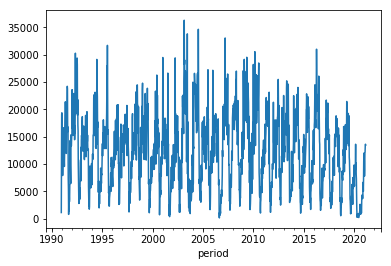

In [11]:
sorted_data['inc'].plot()

In [14]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [15]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

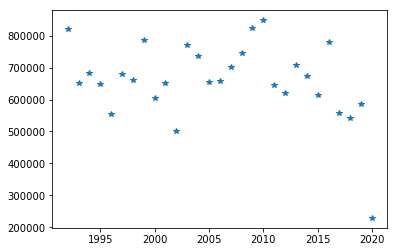

In [16]:
yearly_incidence.plot(style='*')

In [17]:
yearly_incidence.sort_values()

2020    229363
2002    502271
2018    543281
1996    553859
2017    557449
2019    584926
2000    605096
2015    613286
2012    620315
2011    645042
1995    648598
2001    650660
1993    653058
2005    654308
2006    657482
1998    660316
2014    673458
1997    679308
1994    682920
2007    701566
2013    708874
2004    736266
2008    745701
2003    770211
2016    780645
1999    784963
1992    821558
2009    822819
2010    848236
dtype: int64